# Multiple Linear Regression
## Car Value Prediction

#### Problem Statement:

Consider a data set of car with details of car, model, car body, dimension and so on. 
We are required to evaluate the driving forces behind the price of the car.

Essentially, the company wants —

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

In [457]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [458]:
import numpy as np
import pandas as pd

In [459]:
cardata = pd.read_csv("CarPrice_Assignment.csv")

In [460]:
# Check the head of the dataset
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [461]:
cardata.shape

(205, 26)

In [462]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [463]:
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [464]:
#check for missing values
#we concluded that there are no columns having missing values
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [465]:
#extract car company name from column CarName
#create new columns "brand" & "model" and then drop carName column
cardata["CarName"] = cardata.CarName.apply(lambda x: x.split(" "))
cardata["brand"] = cardata.CarName.apply(lambda x: x[0])
cardata["model"] = cardata.CarName.apply(lambda x: x[-1])
cardata = cardata.drop(["CarName"],axis=1)

In [466]:
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Visualising the Data

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

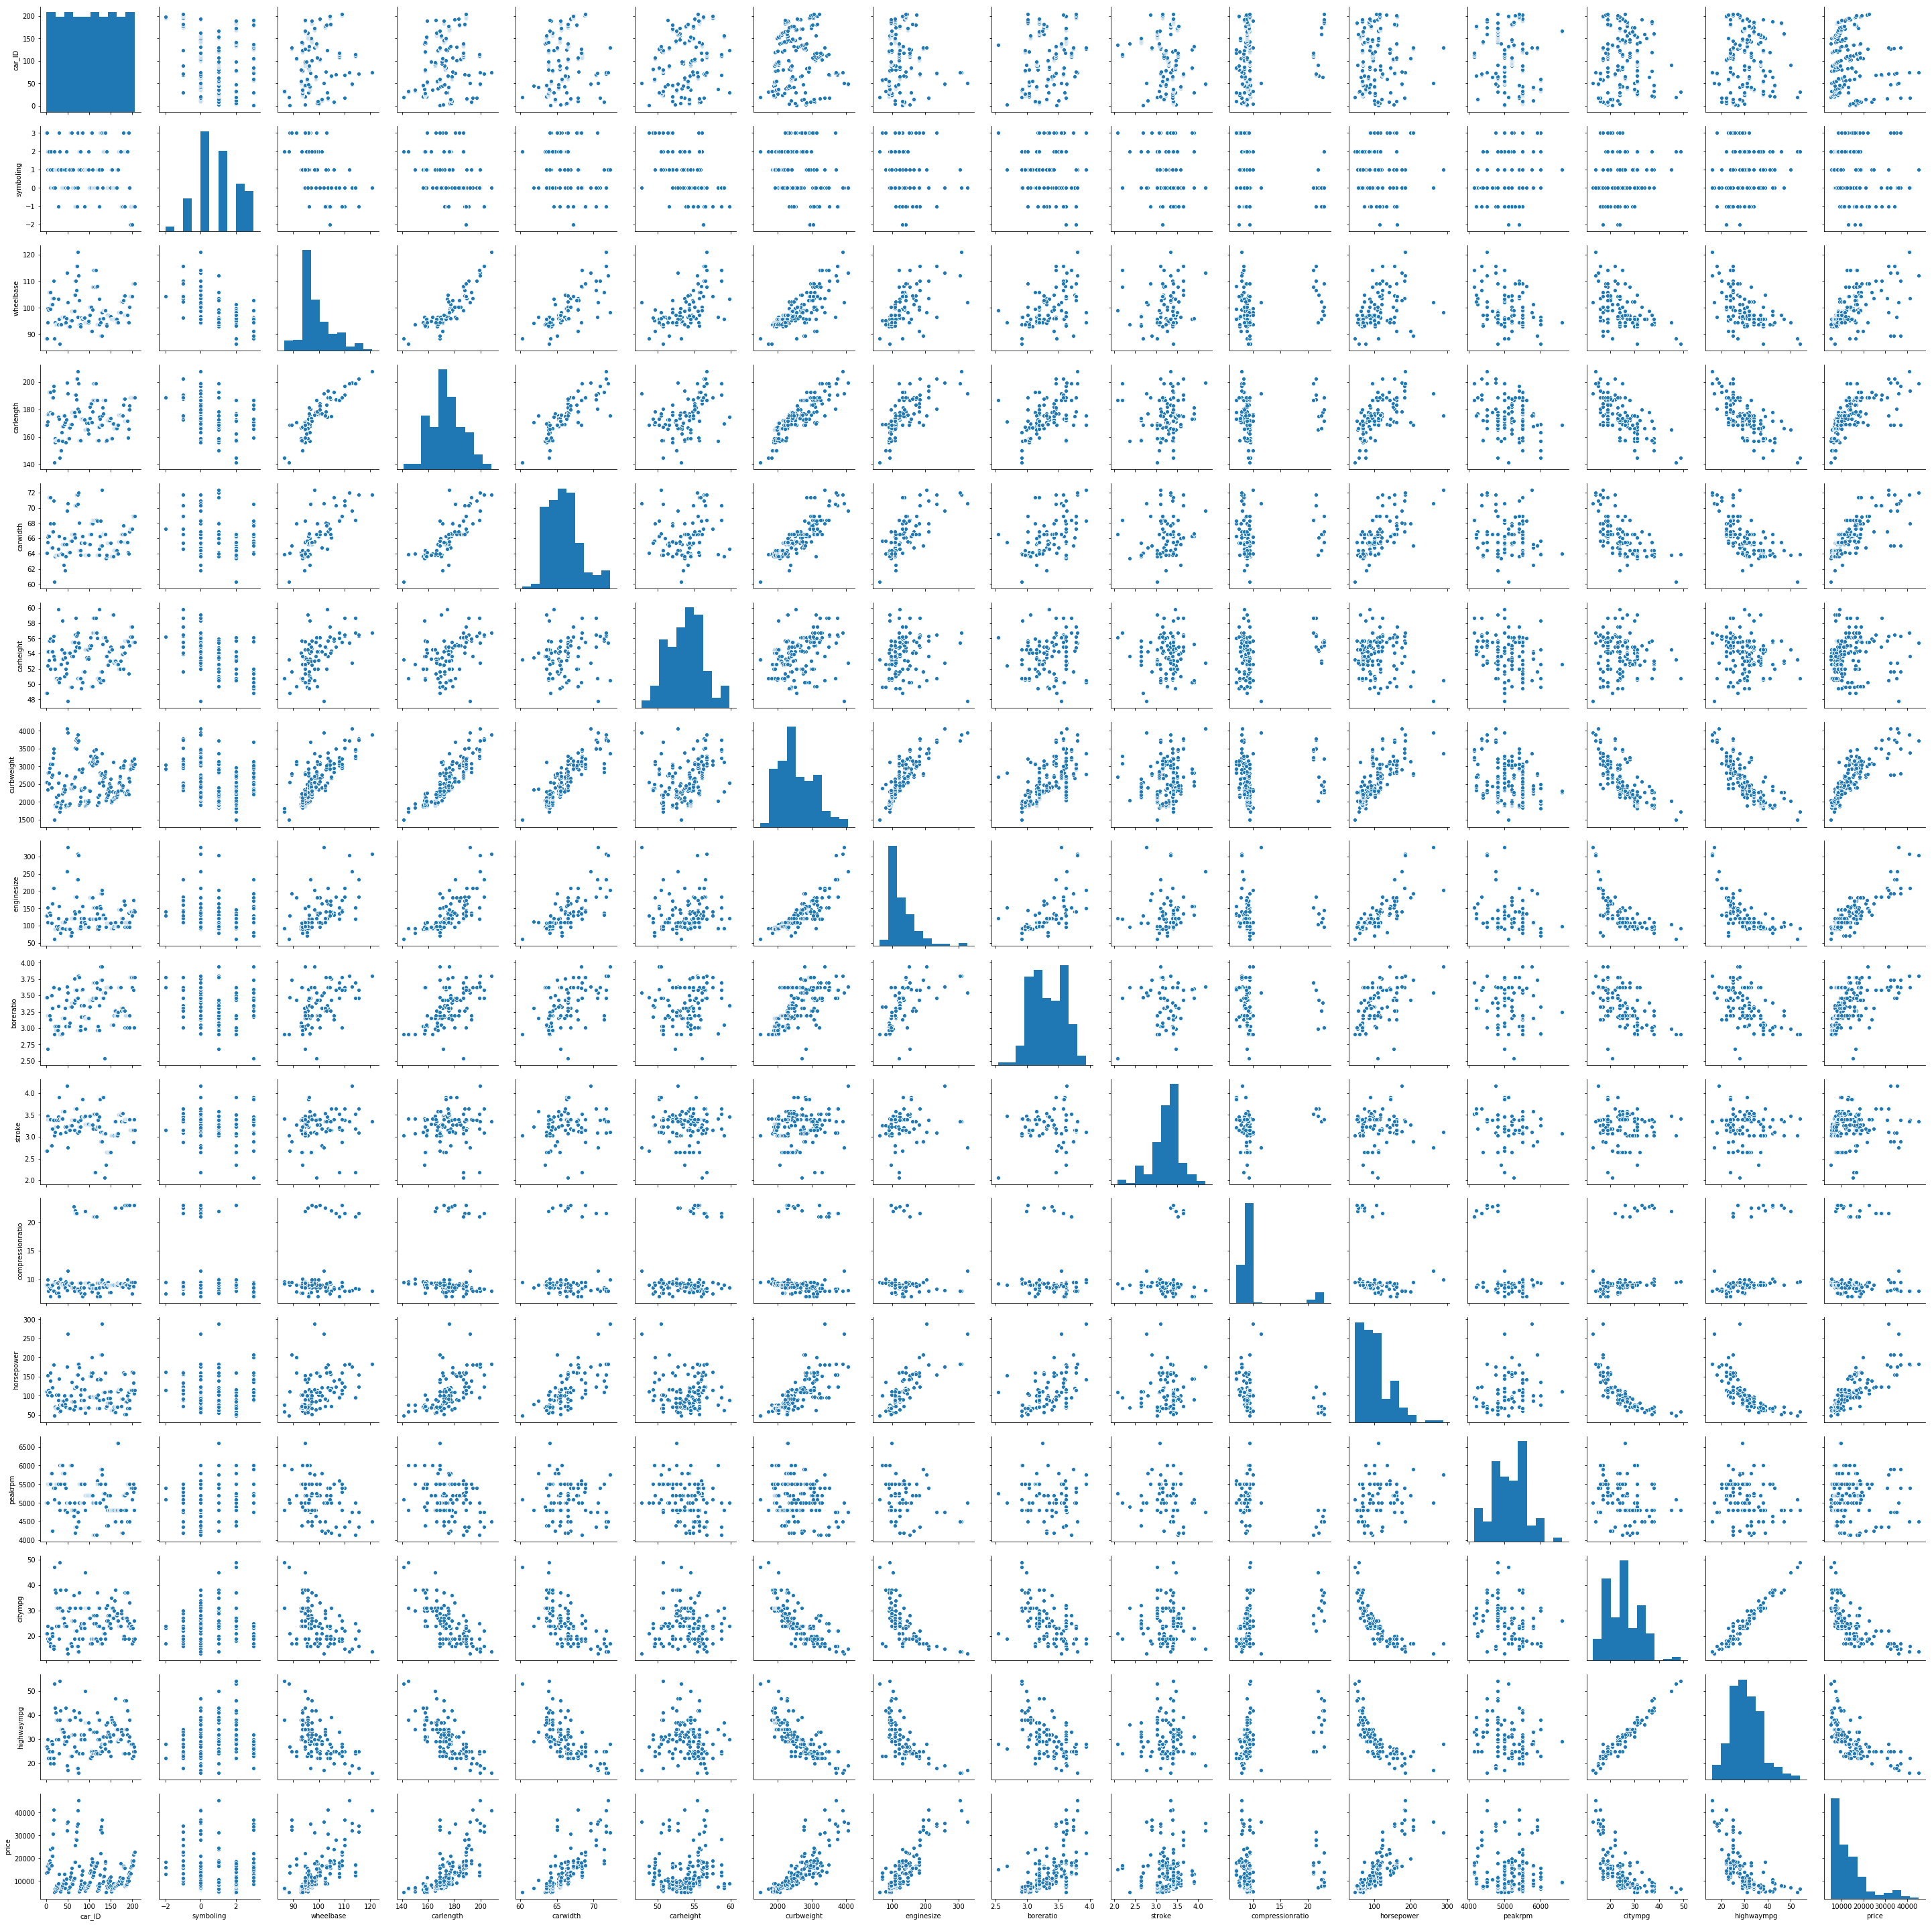

In [468]:
sns.pairplot(cardata)
plt.show()
#from the plot, we can derive few rudimentary observations
#price appears to be positively correlated with wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
#highwaympg and citympg are strongly correlated


In [469]:
#Identify the categorical variables
categorical_features = cardata.dtypes[cardata.dtypes=="object"].index
categorical_features

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand',
       'model'],
      dtype='object')

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

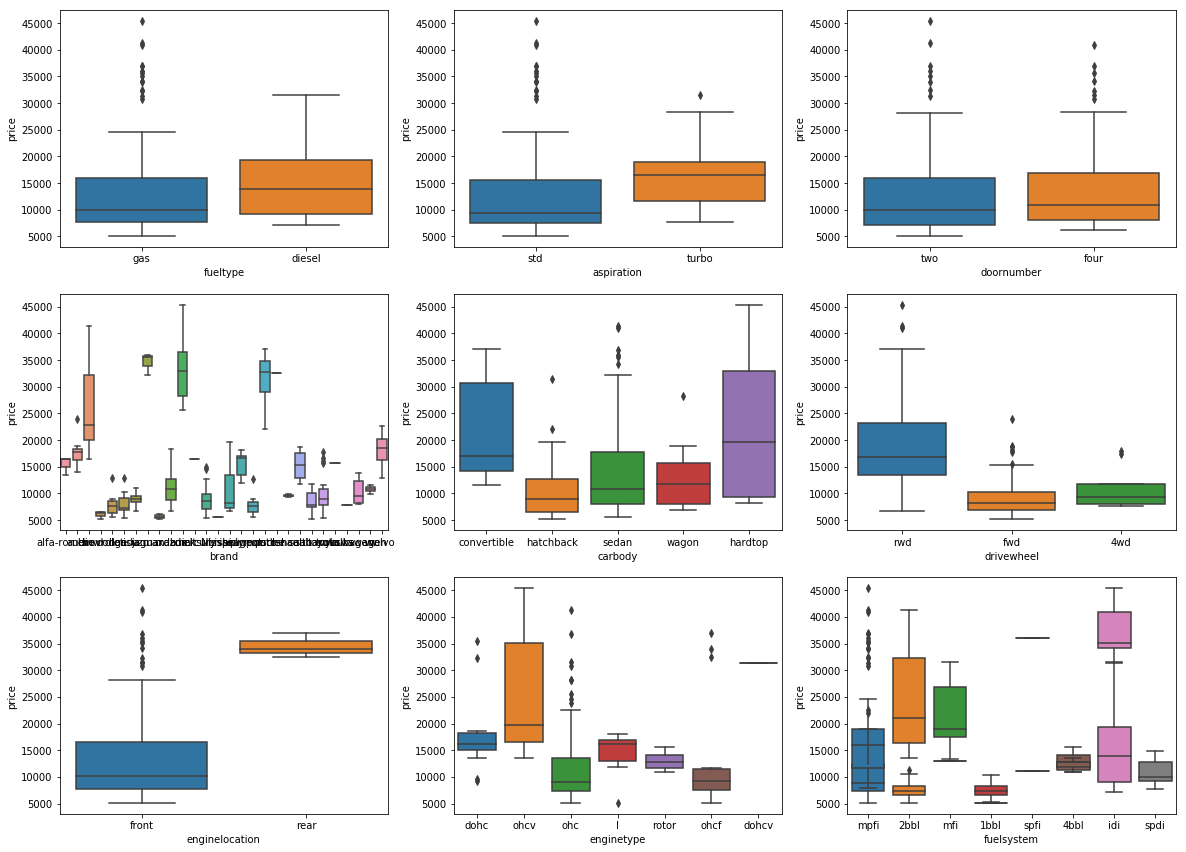

In [470]:
#we can conclude that fuel type impacts the price. Disel cars are costlier than the gas cars
#aspiration also impacts the car price. Turbo cars are costlier than standard
#door numbers do not really affect the price of the car. This is interesting as general notion is four door cars should be costlier than the two doors.
#rear engine cars are costlier than the front engine cars and generally rear engine cars have difficult configuration so in general such kind of placement of engine is more prevalent in racing cars

plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardata)
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cardata)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cardata)
plt.subplot(4,3,4)
sns.boxplot(x = 'brand', y = 'price', data = cardata)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = cardata)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cardata)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.show()

# Step 3: Cleaning the Data

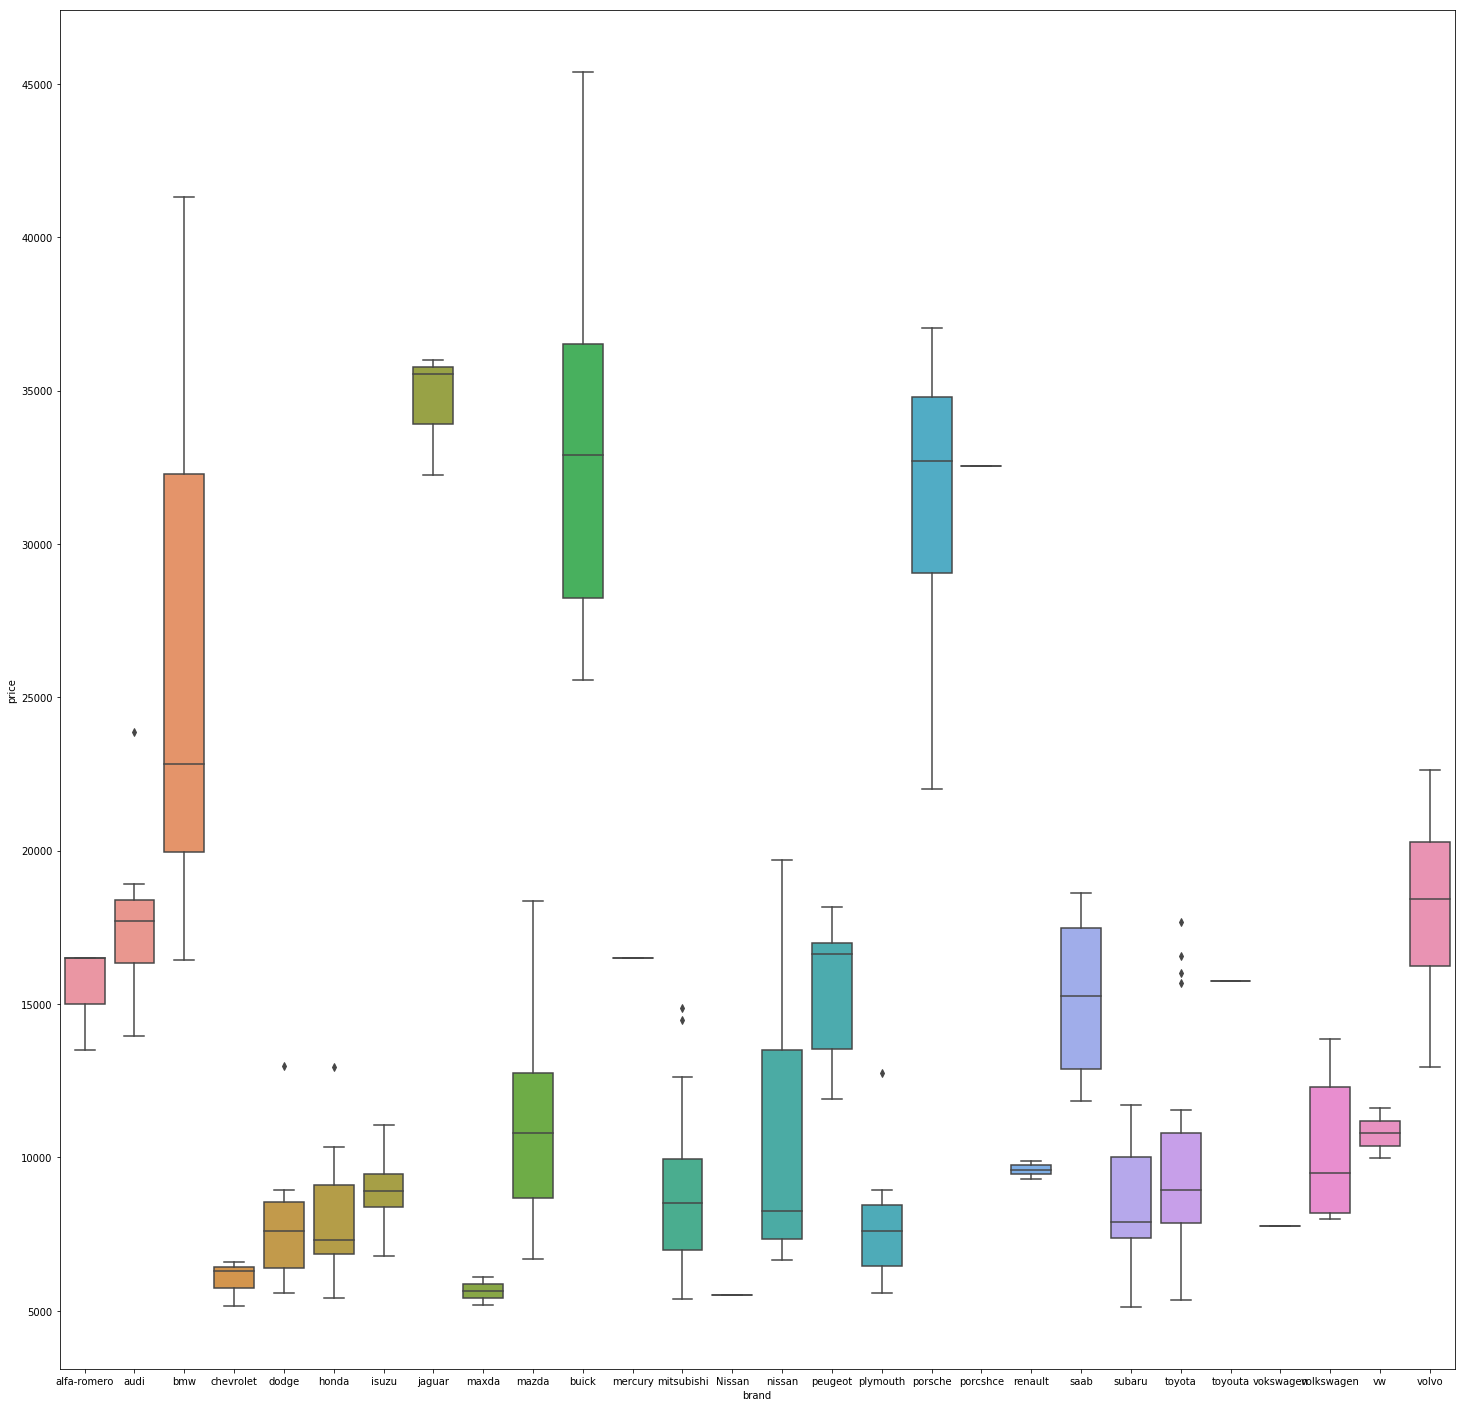

In [471]:
#we can clearly notice that cars of three brands - bmw, porsche and buick are very expensive compared to other brands' cars 
#we also concluded that there is typo in the data
#for an instance, Nissan & nissan are same, porsche & porcshce are same, toyota & toyouta, and volkswagen & vw & volkswagen
plt.figure(figsize = (25, 25))
sns.boxplot(x="brand", y="price", data=cardata)


In [472]:
cardata.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [473]:
#normalizing the brand values
cardata.brand = cardata.brand.str.replace("Nissan","nissan")
cardata.brand = cardata.brand.str.replace("porcshce","porsche")
cardata.brand = cardata.brand.str.replace("vokswagen","volkswagen")
cardata.brand = cardata.brand.str.replace("vw","volkswagen")
cardata.brand = cardata.brand.str.replace("toyouta","toyota")
cardata.brand = cardata.brand.str.replace("maxda","mazda")

#plt.figure(figsize = (10, 5))
#sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
#plt.show()

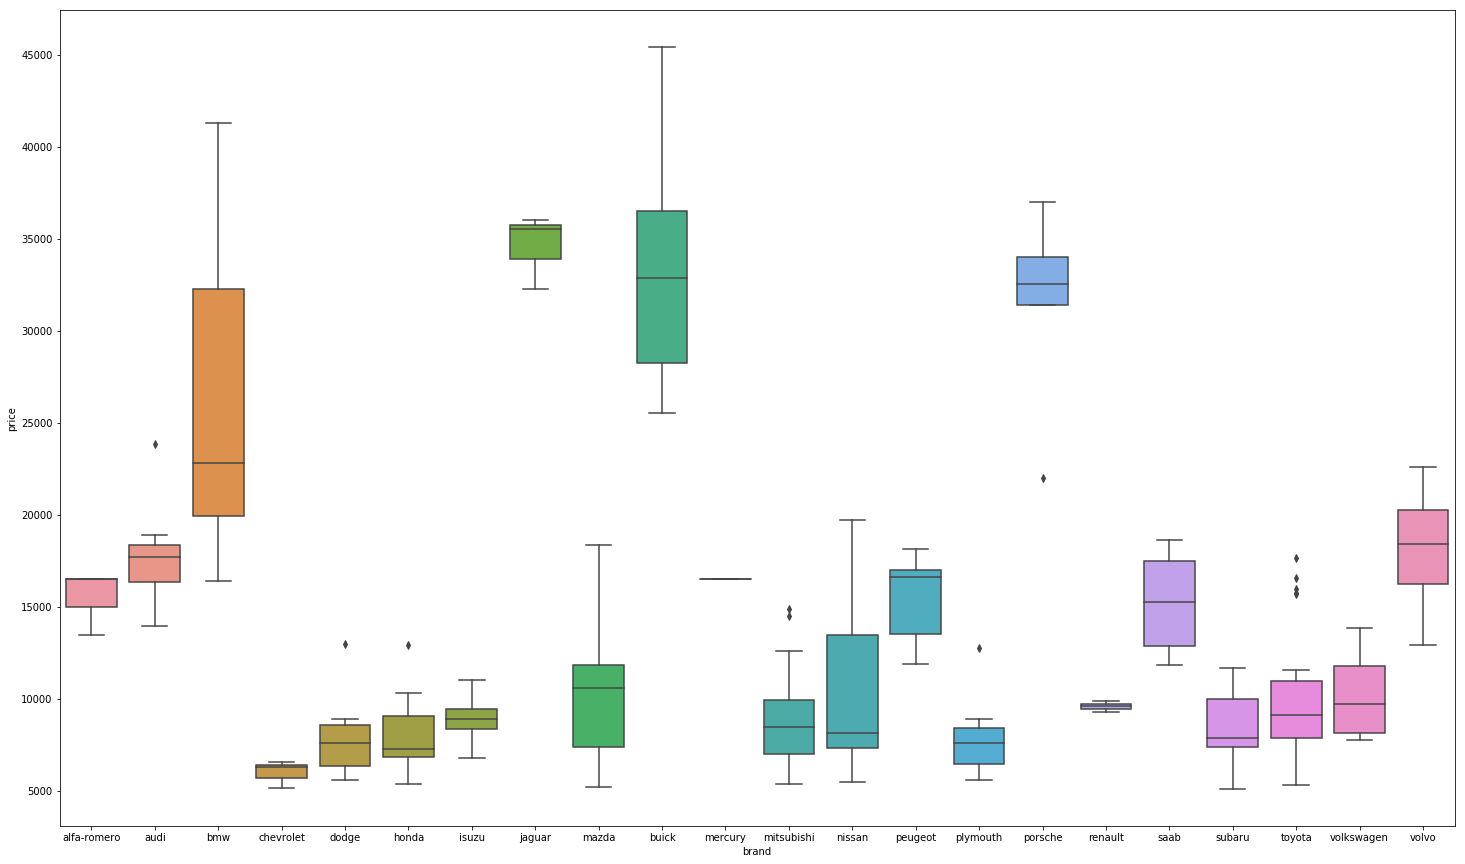

In [474]:
#plotting the brand agains price after cleaning the data
#clearly cars from brands such as buick, bmw, jaguar, porsche are expensive than others
#at the same time, price range of bmw, buick, mazda, and nissan is very dispersed.
plt.figure(figsize = (25, 15))
sns.boxplot(x="brand", y="price", data=cardata)

## Step 4: Data Preparation

- We have few categorical columns. For linear regression algorithms to work effectively we require to convert these column into numeric. We will use one hot encoding for the same. This will give us dummy variables.


In [475]:
#model is not at all having any significance so its better to drop this column
cardata = cardata.drop(["model"],axis=1)

In [476]:
#convert door number column to numeric
cardata.doornumber = cardata.doornumber.map({"two":0,"four":1})

In [477]:
# get categorical features
categorical_features = cardata.dtypes[cardata.dtypes=="object"].index
categorical_features

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem', 'brand'],
      dtype='object')

In [478]:
# get numeric features
numeric_features = cardata.dtypes[cardata.dtypes!="object"].index
numeric_features

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [479]:
#Dummy variables technique for the categorical variables
for i, col_val in enumerate(categorical_features):
    tempDf = pd.get_dummies(cardata[col_val],drop_first = True)
    # Add the results to the original housing dataframe
    cardata = pd.concat([cardata, tempDf], axis = 1)
    cardata = cardata.drop([col_val],axis=1)

In [480]:
# Check the cardata dataframe
cardata.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [481]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cardata, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
We will use MinMax scaling.

In [482]:
from sklearn.preprocessing import MinMaxScaler

In [483]:
scaler = MinMaxScaler()

In [484]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

In [485]:
df_train.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.598039,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,0.612745,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,0.813725,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,0.004902,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,0.975490,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


In [486]:
df_train.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.478061,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.289106,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232843,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.470588,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.718137,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


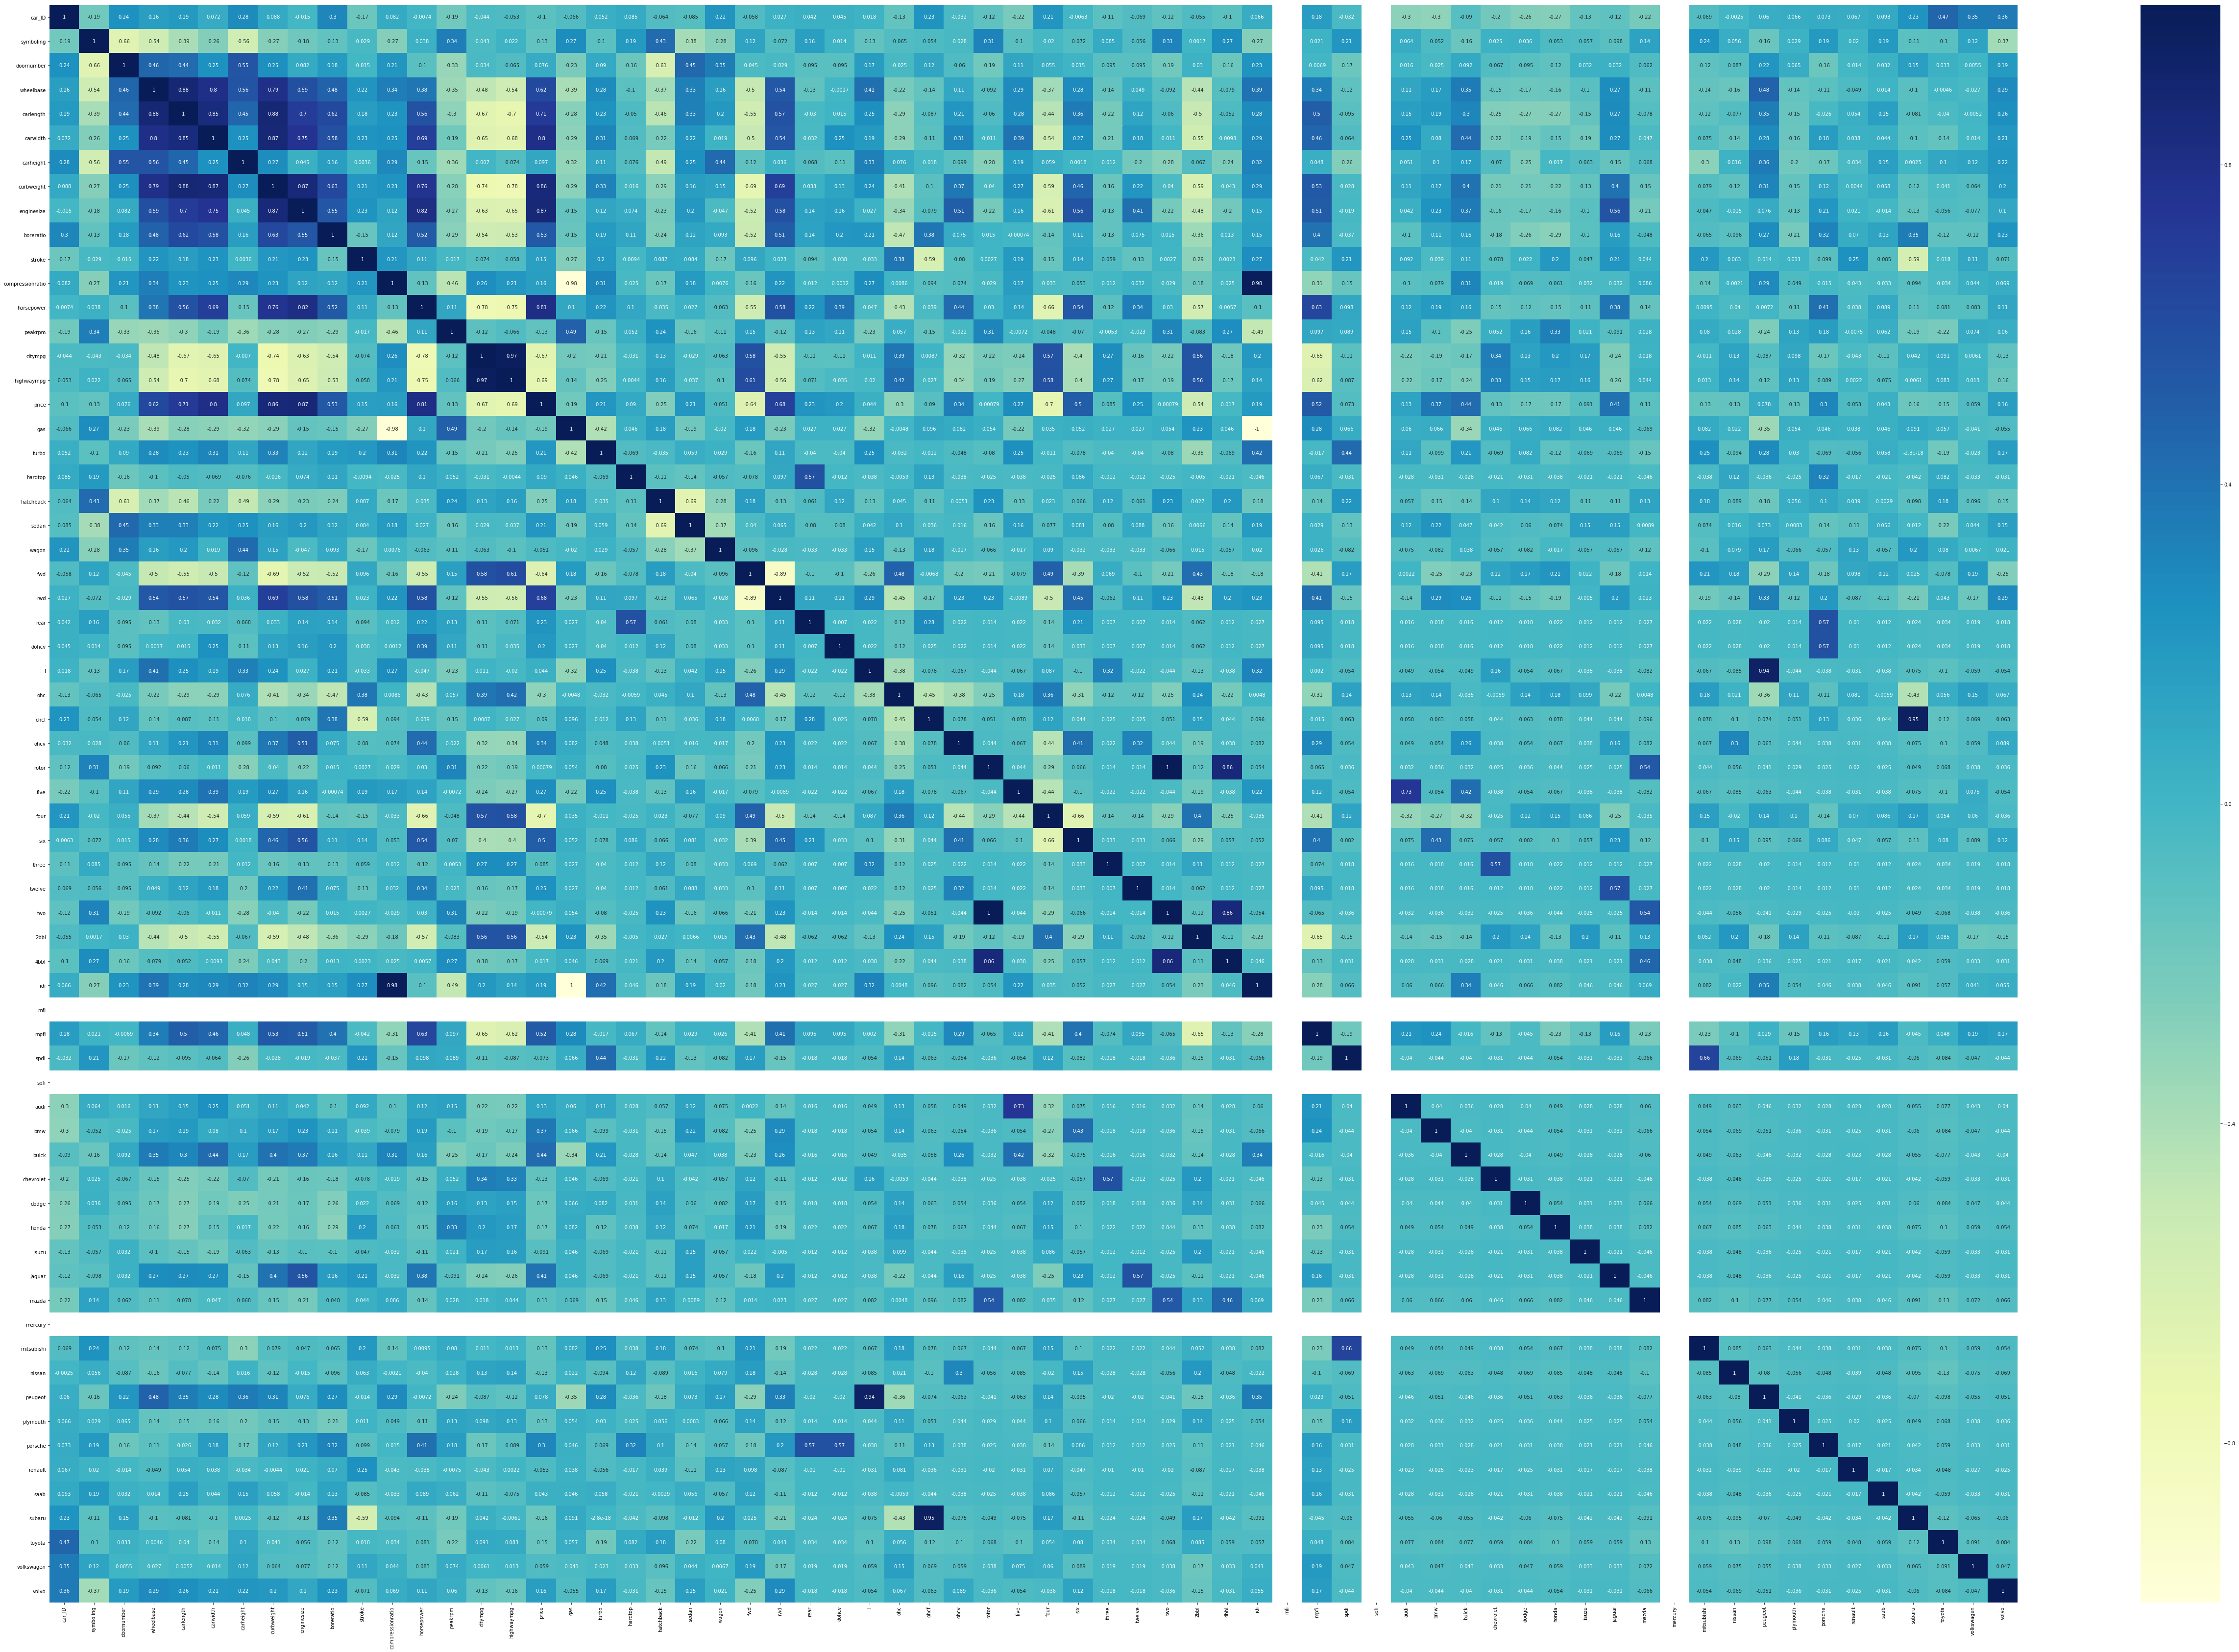

In [487]:
# Let's check the correlation coefficients to see which variables are highly correlated
# we figure out that there is only record for mercury- brand, spfi-fuelsystem and mfi-system 
plt.figure(figsize = (90, 60))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

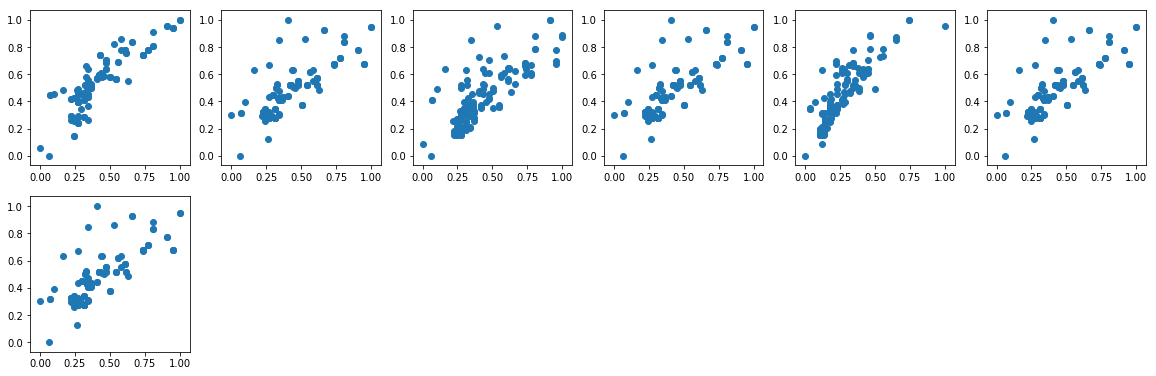

In [488]:
#wheelbase, carlength, carwidth, curbweight are highly correlated
#enginesize, curbweight are highly correlated
#we keep this information with us so that later on multicollinearity effect can be removed
plt.figure(figsize=[20,20])
plt.subplot(6,6,1)
plt.scatter(df_train.wheelbase, df_train.carlength)
plt.subplot(6,6,2)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,3)
plt.scatter(df_train.wheelbase, df_train.curbweight)
plt.subplot(6,6,4)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,5)
plt.scatter(df_train.enginesize, df_train.curbweight)
plt.subplot(6,6,6)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,7)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.show()

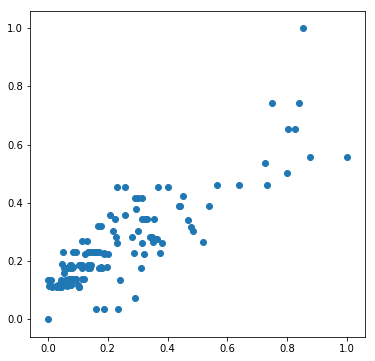

In [489]:
#We observed that `price` seems to the correlated to `enginesize` the most. Let's see a pairplot for `price` vs `enginesize`.
plt.figure(figsize=[6,6])
plt.scatter(df_train.price, df_train.enginesize)

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [490]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [491]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [492]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

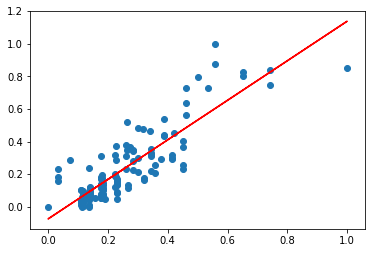

In [493]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [494]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.09e-44
Time:                        15:24:14   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `curbweight`.

In [495]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [496]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [497]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 19 May 2019   Prob (F-statistic):           5.31e-50
Time:                        15:24:21   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.753` from `0.802`. AIC and BIC values are also diminished and difference between R-squared and adjusted R-squared is small.
Let's go ahead and add another variable, `horsepower`.

In [498]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','horsepower']]

In [499]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [500]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 19 May 2019   Prob (F-statistic):           2.16e-51
Time:                        15:24:23   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [501]:
# Check all the columns of the dataframe

cardata.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [502]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [503]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
61,subaru,inf
56,peugeot,inf
36,two,inf
34,three,inf
30,rotor,inf
28,ohcf,inf
26,l,inf
24,rear,inf
16,gas,2754.320000
0,car_ID,810.660000


As there are many variables to evaluate, we first use RFE to eliminate variables to 15 and then we will perform model evaluation manually.

In [504]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [505]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [506]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 10),
 ('symboling', False, 47),
 ('doornumber', False, 45),
 ('wheelbase', False, 31),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', False, 22),
 ('peakrpm', False, 12),
 ('citympg', False, 21),
 ('highwaympg', False, 20),
 ('gas', False, 3),
 ('turbo', False, 19),
 ('hardtop', False, 33),
 ('hatchback', False, 32),
 ('sedan', False, 34),
 ('wagon', False, 35),
 ('fwd', False, 48),
 ('rwd', False, 42),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 2),
 ('ohc', False, 46),
 ('ohcf', False, 41),
 ('ohcv', False, 44),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 13),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 43),
 ('4bbl', False, 37),
 ('idi', False, 27),
 ('mfi', False, 49),
 ('mpfi', False, 39),
 ('spdi', False, 40)

In [507]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'rear',
       'dohcv', 'rotor', 'five', 'four', 'three', 'twelve', 'two', 'bmw',
       'peugeot'],
      dtype='object')

In [508]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'six', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [509]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [510]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [511]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [512]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 19 May 2019   Prob (F-statistic):           3.04e-69
Time:                        15:24:59   Log-Likelihood:                 213.65
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     128   BIC:                            -352.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2901      0.039     -7.460      0.0

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [515]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,rotor,inf
13,two,inf
0,const,65.630000
3,enginesize,27.670000
10,four,13.650000
2,curbweight,11.290000
1,carwidth,6.070000
4,boreratio,5.580000
12,twelve,3.060000
9,five,2.990000


In [517]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('rotor', 1,)

KeyError: "['rotor'] not found in axis"

In [518]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [519]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [520]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Sun, 19 May 2019   Prob (F-statistic):           3.34e-49
Time:                        15:27:31   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1854      0.160  

In [521]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.63
3,enginesize,27.67
9,four,13.65
2,curbweight,11.29
1,carwidth,6.07
4,boreratio,5.58
12,two,5.57
11,twelve,3.06
8,five,2.99
5,stroke,2.46


In [533]:
# Dropping highly correlated variables and insignificant variables
#curbweight, enginesize, dohcv
X_train_rfe = X_train_rfe.drop('three', 1,)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
# Print the summary of the model
print(lm.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.08
Date:                Sun, 19 May 2019   Prob (F-statistic):           7.66e-53
Time:                        15:34:06   Log-Likelihood:                 161.21
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     132   BIC:                            -267.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0743      0.044     -1.681      0.0

,Features,VIF
0,const,41.93
1,carwidth,3.84
6,four,2.74
2,boreratio,2.20
5,five,1.50
10,peugeot,1.30
3,stroke,1.29
8,two,1.27
9,bmw,1.23
4,rear,1.16


In [525]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.63
3,enginesize,27.67
9,four,13.65
2,curbweight,11.29
1,carwidth,6.07
4,boreratio,5.58
12,two,5.57
11,twelve,3.06
8,five,2.99
5,stroke,2.46


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [59]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('price')
X_test = df_test

In [62]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [63]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [64]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

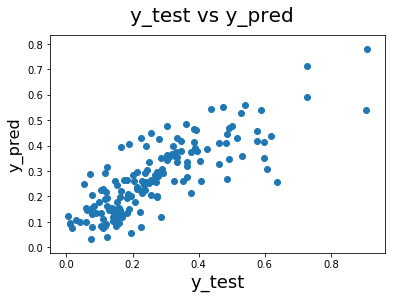

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model